In [40]:
import numpy as np
import pandas as pd
import math
import geopy.distance
import matplotlib.pyplot as plt
import seaborn

In [41]:
# reading input from file
places = pd.read_csv('./places.txt', header=None, names=['y', 'x'])
places = places.reindex(columns=['x', 'y'])

In [42]:
# running kmeans algo
k = 3

# setting initial centroids using kmeans++
centroids = places.sample()
curr_centroid = centroids.iloc[0]
for i in range(1, k):
    farthest = None
    dist = 0
    for index, row in places.iterrows():
        # selecting point furthest from current centroid
        curr_dist = np.linalg.norm(np.array(curr_centroid) - np.array(row))
        if curr_dist > dist:
            farthest = row
            dist = curr_dist
    curr_centroid = farthest
    centroids = centroids.append(curr_centroid)

# setting cluster_no of each place
cluster_no = np.repeat(-1, places.shape[0])
places['cluster_no'] = cluster_no

# run kmeans until convergence
converged = False
while not converged:
    # assign each point to its closest centroid
    for index, row in places.iterrows():
        dist_c0 = geopy.distance.distance(np.array(centroids.iloc[0]),np.array(row)[:2]).km
        dist_c1 = geopy.distance.distance(np.array(centroids.iloc[1]), np.array(row)[:2]).km        
        dist_c2 = geopy.distance.distance(np.array(centroids.iloc[2]), np.array(row)[:2]).km
        min_dist = np.array([dist_c0, dist_c1, dist_c2]).min()
        if min_dist == dist_c0:
            places.cluster_no.loc[index] = 0
        elif min_dist == dist_c1:
            places.cluster_no.loc[index] = 1
        else:
            places.cluster_no.loc[index] = 2
    # recompute centroids of each cluster
    new_centroid_x = np.array([])
    new_centroid_y = np.array([])
    for i in range(k):
        centroid = places[places['cluster_no'] == i]
        new_centroid_x = np.append(new_centroid_x, centroid.x.mean())
        new_centroid_y = np.append(new_centroid_y, centroid.y.mean())
    new_centroids = pd.DataFrame(data={'x': new_centroid_x, 'y': new_centroid_y})
    if centroids.equals(new_centroids):
        converged = True
    else:
        centroids = new_centroids
places.head()

C:\Users\cathe\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,x,y,cluster_no
0,33.451625,-112.070792,1
1,33.449298,-112.065542,1
2,33.456491,-112.073931,1
3,33.470116,-112.074866,1
4,43.477099,-80.525690,2


In [43]:
# saving output to clusters.txt
output = places.cluster_no
output.to_csv('clusters.txt', sep=' ', index=True)

In [44]:
# saving original output
modified_places = places.copy(deep=True)

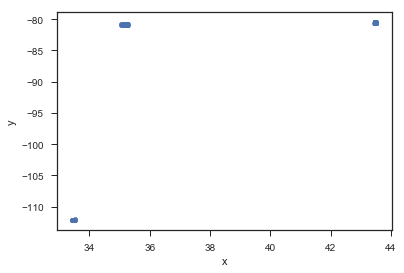

In [47]:
# plotting all points 
places.plot.scatter(x='x', y='y')

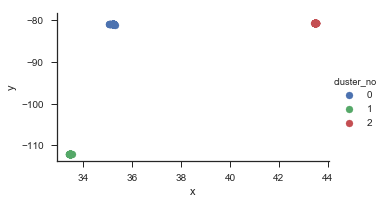

In [48]:
# plotting output
seaborn.set(style='ticks')

_cluster_no = [0, 1, 2]
fg = seaborn.FacetGrid(data=places, hue='cluster_no', hue_order=_cluster_no, aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

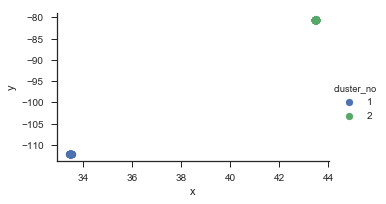

In [50]:
_cluster_no = [1,2]
subset_data = places[(places['cluster_no'] == 1) | (places['cluster_no'] == 2)]
fg = seaborn.FacetGrid(data=subset_data, hue='cluster_no', hue_order=_cluster_no, aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

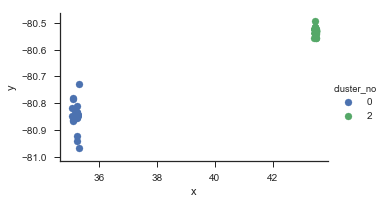

In [51]:
_cluster_no = [0,2]
subset_data = places[(places['cluster_no'] == 0) | (places['cluster_no'] == 2)]
fg = seaborn.FacetGrid(data=subset_data, hue='cluster_no', hue_order=_cluster_no, aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()

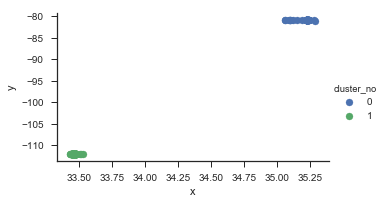

In [52]:
_cluster_no = [0,1]
subset_data = places[(places['cluster_no'] == 0) | (places['cluster_no'] == 1)]
fg = seaborn.FacetGrid(data=subset_data, hue='cluster_no', hue_order=_cluster_no, aspect=1.61)
fg.map(plt.scatter, 'x', 'y').add_legend()